In [97]:
#|default_exp digit_torch

In [98]:
#|export
# Import relevant libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [99]:
#|export
# Get the relevant dataset and do the required preprocessing

image_size = 28

composed = transforms.Compose([
    transforms.Resize(size = (image_size,image_size)),
    transforms.RandomAffine(degrees=45,shear=1),
    transforms.ToTensor()
])

train_dataset = dsets.MNIST(root='./data',download=True,train = True,transform = composed)
test_dataset = dsets.MNIST(root='./data',download=True,train = False,transform = composed)

In [100]:
#|export
# Define the convolutional model


class CNN(nn.Module):

    def __init__(self,num_filters1,num_filters2):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1,out_channels=num_filters1,kernel_size=3,stride=1,padding='same')
        self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.cnn2 = nn.Conv2d(in_channels=num_filters1,out_channels=num_filters2,kernel_size=3,stride=1,padding='same')
        self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.fc1 = nn.Linear(49*num_filters2,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0),-1)
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        return x

In [101]:
#|export
# Define the parameters

input_shape = (28, 28, 1)
learning_rate = 1e-1
train_accuracy_list = []
test_accuracy_list = []
loss_list = []
batch_size = 256
test_batch_size = 6000
epochs = 10

#Define the model

model = CNN(16,32)

#Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [102]:
#|export
#Define the dataloaders

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=test_batch_size)

#Train the model

loss = 0
accuracy = 0

for epoch in range(epochs):
    correct_train = 0
    loss = 0
    for x,y in train_loader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss_val = criterion(y_pred,y)
        loss_val.backward()
        optimizer.step()
        loss += loss_val
        _, yhat = torch.max(y_pred.data, 1)
        correct_train += (yhat == y).sum().item()
    accuracy = correct_train / len(train_dataset)*100
    train_accuracy_list.append(accuracy)
    loss_list.append(loss.data)
    correct_test = 0
    for x,y in test_loader:
        y_pred = model(x)
        _, yhat = torch.max(y_pred.data, 1)
        correct_test += (yhat == y).sum().item()
    accuracy = correct_test / len(test_dataset)*100
    test_accuracy_list.append(accuracy)
    print(f"Loss: {loss}, Accuracy: {accuracy}")

Loss: 402.99554443359375, Accuracy: 0.7486
Loss: 102.30408477783203, Accuracy: 0.9077
Loss: 50.11988067626953, Accuracy: 0.9191
Loss: 35.48686218261719, Accuracy: 0.946
Loss: 28.585735321044922, Accuracy: 0.9271
Loss: 25.075105667114258, Accuracy: 0.9659
Loss: 22.467544555664062, Accuracy: 0.966
Loss: 19.553483963012695, Accuracy: 0.9723
Loss: 18.404064178466797, Accuracy: 0.9714
Loss: 16.987245559692383, Accuracy: 0.9759


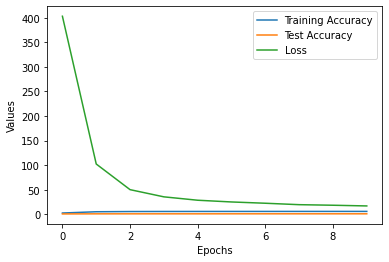

In [105]:
#|export
# Plot the loss and accuracy
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.plot(test_accuracy_list, label='Test Accuracy')
plt.plot(loss_list, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

In [106]:
import nbdev
nbdev.export.nb_export('digit_torch.ipynb', 'digit_torch')